## Исследование объявлений о продаже квартир

### Шаг 1.  Изучим общую информацию о данных. 

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Видно, что в данных значения разного типа и есть пропущенные значения. Посмотрим общую информацию.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В исходных данных **23699** объектов и **22** признака: 14 признаков типа *float*, 3 - типа *int*, 2 - булевых типа и 3 объекта. 

Посмотрим на данные более внимательно.

### Шаг 2. Предобработка данных

In [4]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f'Количество пропущенных значений:\n{missing_values}')
print('\nДоля пропущенных значений в данных: {:.1%}'.format(missing_values.sum()/data.size))

Количество пропущенных значений:
is_apartment           20924
parks_nearest          15620
ponds_nearest          14589
balcony                11519
ceiling_height          9195
airports_nearest        5542
cityCenters_nearest     5519
ponds_around3000        5518
parks_around3000        5518
days_exposition         3181
kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
dtype: int64

Доля пропущенных значений в данных: 19.5%


#### total_images

In [5]:
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

#### last_price

In [6]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Видны аномально низкое, минимальное, и высокое, максимальное, значения. Медиана меньше среднего, значит, в данных присутсвуют "тяжёлые хвосты" аномально высоких значений.

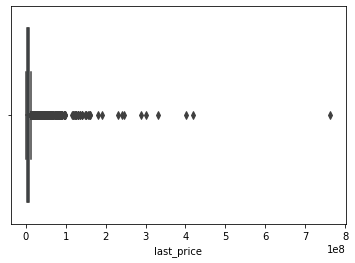

In [13]:
sns.boxplot(x='last_price', data=data)

In [14]:
len(data.query('last_price > 100000000 or last_price <500000'))

51

#### total_area 

In [15]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [16]:
len(data.query('total_area > 200'))

227

Видно, что в данных есть аномально высокие значения.

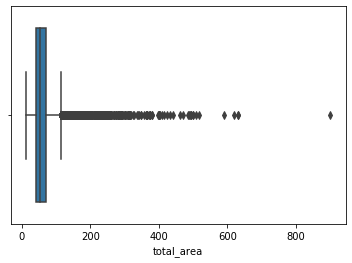

In [17]:
sns.boxplot(x='total_area', data=data)

#### first_day_exposition

In [18]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

#### rooms 

In [19]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [20]:
len(data.query('rooms == 0')), len(data.query('rooms > 6'))

(197, 90)

Присутствуют станные объявления квартир, в которых нет ни одной комнаты, и объявления квартир, в которых больше 6 комнат. Возможно, в объявлениях, в которых больше 6 комнат, комнатами считаются все помещения: кухня, кладовая, ванная, балкон. 

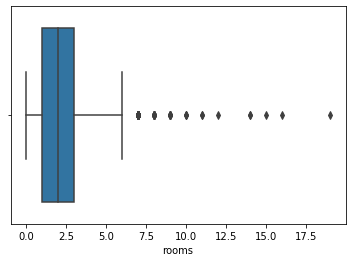

In [21]:
sns.boxplot(x='rooms', data=data)

#### ceiling_height

In [22]:
data['ceiling_height'].isnull().sum()

9195

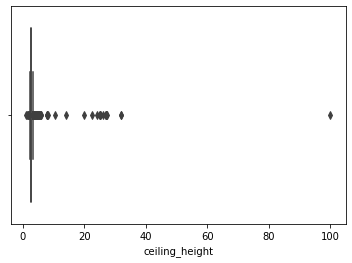

In [23]:
sns.boxplot(x='ceiling_height', data=data)

Высота потолков - выжный параметр, попробуем заменить пропуски медианным значением парамтера по населенному пункту.

In [24]:
data.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median').head()

,ceiling_height
locality_name,
Бокситогорск,3.90
Волосово,2.50
Волхов,2.58
Всеволожск,2.70
Выборг,2.55


In [25]:
def fillna_median(data, column):
    data[column] = data[column].fillna(data.groupby('locality_name')[column].transform('median'))

    return data

In [26]:
data = fillna_median(data, 'ceiling_height')

In [27]:
data['ceiling_height'].isnull().sum() # осталось немного пропущенных занчений

156

In [28]:
data['ceiling_height'].describe()

count    23543.000000
mean         2.734102
std          1.012723
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что в данных есть аномально низкие значения (высота потолков менне 1.5 м) и аномально высокие значения (высота поптолков более 5 м).

In [29]:
len(data.query('ceiling_height < 1.5 or ceiling_height > 5')['ceiling_height'])

42

#### floors_total

In [30]:
data['floors_total'].isnull().sum()

86

Общее количество этажей в доме - важный параметр при покупке квартиры, попробуем заменить пропущенные значения на моду. Мода для количетсва этажей - это самая популярная этажность дома. 

Заполенение медианой по населённому району в данном случае не лучший вариант, так как рискуем заполнить все пропуски, например, семиэтажками, которых на самом деле мало.

In [31]:
mode = data['floors_total'].mode()[0]
mode

5.0

In [32]:
data['floors_total'] = data['floors_total'].fillna(mode)

In [33]:
data['floors_total'] = data['floors_total'].astype(int) # количетство - целочисленное значение

In [34]:
data['floors_total'].describe()

count    23699.000000
mean        10.653234
std          6.594024
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

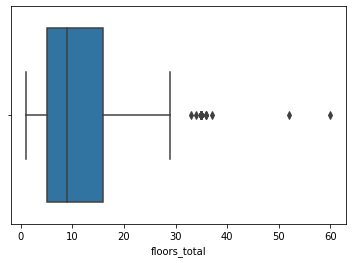

In [35]:
sns.boxplot(x='floors_total', data=data)

#### living_area

In [36]:
data['living_area'].isnull().sum()

1903

Жилая площадь - важный параметр при покупке квартиры, попробуем заменить пропущенные значения на медианное значение по населенному району.

In [37]:
data.pivot_table(index='locality_name', values='living_area', aggfunc='median').head()

,living_area
locality_name,
Бокситогорск,29.5
Волосово,29.8
Волхов,30.3
Всеволожск,30.0
Выборг,30.0


In [38]:
data = fillna_median(data, 'living_area')

In [39]:
data['living_area'].isnull().sum() # осталось немного пропущенных значений

22

In [40]:
data['living_area'].describe()

count    23677.000000
mean        34.069243
std         21.228270
min          2.000000
25%         19.000000
50%         30.450000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

In [41]:
len(data.query('living_area < 5 or living_area > 100')['living_area'])

359

Видны анмоально низкие значения и аномально выскоий значения жилой площади.

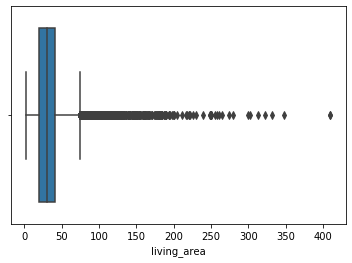

In [42]:
sns.boxplot(x='living_area', data=data)

#### floor

In [43]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

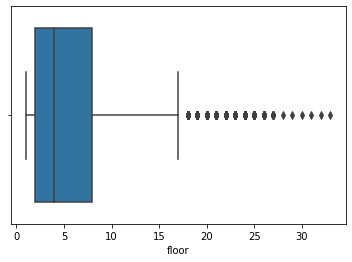

In [44]:
sns.boxplot(x='floor', data=data)

#### is_apartment

In [45]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В архиве всего 50 объявлений о продаже апартаментов. 

Возможная причина пропуска - человеческий фактор: если данные собирались разными пользователями, то кто-то мог явно указывать, что в объявлении продается квартра, а кто-то мог считать, что если параметр не указан, это по умочанию значит, что продаётся квартира.

Предположим, что пропуск этого признака значит, что объявление о продаже квартиры, не аппартаментов. Заменили также булевый тип на целочисленный, так данные смогут использоваться для дальнейшего анализа.

In [46]:
data['is_apartment'] = data['is_apartment'].apply(lambda x: 1 if x == True else 0)

#### studio                

In [47]:
data['studio'] = data['studio'].astype(int)

In [48]:
data['studio'].value_counts()

0    23550
1      149
Name: studio, dtype: int64

#### open_plan 

In [49]:
data['open_plan'] = data['open_plan'].astype(int)

In [50]:
data['open_plan'].value_counts()

0    23632
1       67
Name: open_plan, dtype: int64

Заменили булевый тип на целочисленный, так данные удобнее использоваться для дальнейшего анализа.

#### kitchen_area            

In [51]:
data['kitchen_area'].isnull().sum()

2278

Площадь кухни - важный параметр при покупке квартиры. Посчитаем среднее отношение площади кухни к общей площади. После этого восстановим площадь кухни, умножив общую площадь на этот коэффициент.

In [52]:
mean_kitchen_to_total = (data['kitchen_area'] / data['total_area']).mean()

In [53]:
data['kitchen_area'] = mean_kitchen_to_total * data['total_area']

In [54]:
data['kitchen_area'].describe()

count    23699.000000
mean        11.306606
std          6.679961
min          2.248257
25%          7.494190
50%          9.742446
75%         13.096096
max        168.619265
Name: kitchen_area, dtype: float64

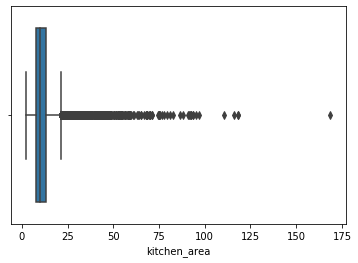

In [55]:
sns.boxplot(x='kitchen_area', data=data)

#### balcony

In [56]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Предположим, что если в объявлении не указано количество балконов - это значит, что их нет. Приведем к целочисленному типу - в квартире не может быть дробное количество балконов.

In [57]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

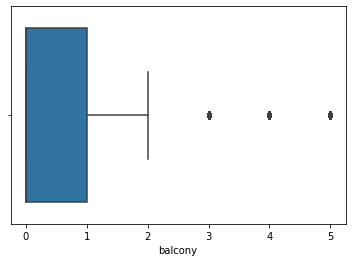

In [58]:
sns.boxplot(x='balcony', data=data)

#### locality_name

In [59]:
data['locality_name'].isnull().sum()

49

Если в объявлении не указан населенный пункт, где находится квартира, - это очень подозрительно. **Возможно объявление ненастоящее.**

#### airports_nearest

In [61]:
data['airports_nearest'].isnull().sum()

5542

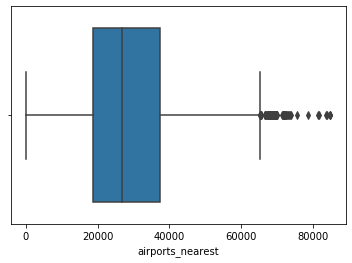

In [62]:
sns.boxplot(x='airports_nearest', data=data)

#### cityCenters_nearest

In [63]:
data['cityCenters_nearest'].isnull().sum()

5519

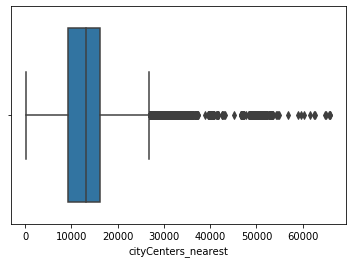

In [64]:
sns.boxplot(x='cityCenters_nearest', data=data)

#### parks_around3000

In [65]:
data['parks_around3000'].isnull().sum()

5518

#### parks_nearest

In [66]:
data['parks_nearest'].isnull().sum()

15620

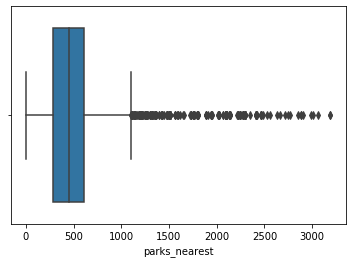

In [67]:
sns.boxplot(x='parks_nearest', data=data)

#### ponds_around3000

In [68]:
data['ponds_around3000'].isnull().sum()

5518

#### ponds_nearest

In [69]:
data['ponds_nearest'].isnull().sum()

14589

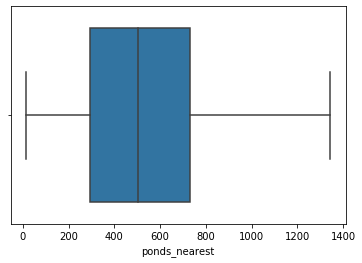

In [70]:
sns.boxplot(x='ponds_nearest', data=data)

In [71]:
len(data[data['ponds_around3000'].isnull() & data['parks_around3000'].isnull() & data['cityCenters_nearest'].isnull() & data['airports_nearest'].isnull()])

5518

Данных, собранных на основе картографических сведений, довольно мало, и у нас нет оснований утверждать, что в одном населенном пункте все квартиры равноудалены от прудов и парков. Просто оставим эти пропуски.

#### days_exposition

In [72]:
data['days_exposition'].isnull().sum()

3181

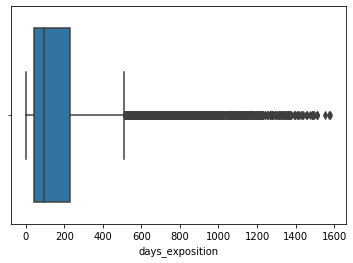

In [73]:
sns.boxplot(x='days_exposition', data=data)

Возможно, эти объявления все еще не закрыты.

### Вывод

In [74]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f'Количество пропущенных значений:\n{missing_values}')
print('\nДоля пропущенных значений в данных: {:.1%}'.format(missing_values.sum()/data.size))

Количество пропущенных значений:
parks_nearest          15620
ponds_nearest          14589
airports_nearest        5542
cityCenters_nearest     5519
ponds_around3000        5518
parks_around3000        5518
days_exposition         3181
ceiling_height           156
locality_name             49
living_area               22
dtype: int64

Доля пропущенных значений в данных: 10.7%


Предобработка помогла снизить долю пропущенных занчений с 19.5% до 10.7%. Пропущенные значения - высота потолков и жилая площадь - заменили на медианное значение по населенному райнону по возможности; пропуски для количества этажей в доме заполнили модой, самой частой этажностью дома в городе; пропущенные значения для площади кухни восстановили, посчитав среднее отношения площади кухни к общей площади и умножили этот коэффициент на общую площадь.

Пропуски в данных, полученных на основе картощрафических данных решили не трогать (расстояния до аэропотра, центра города, ближайшего парка, ближайшего водоема, количестов парков и водоемов в округе).

При рассмотрении в данных были однаружены явные аномалии:

- слишком высокие (более 100 млн рублей) и низкие (менее 500 тыс рублей) цены;

- аномально больше квартиры с площадью (более 200 кв м);

- очень низкие значения высоты потолков  (менее 1.5 м) и очень высокие значения высоты потолков (более 5 м);

- квартиры без комнат и с более чем 6 комнатами;

- в 49 объявлениях не указан населенный пункт.

Данные аномалии в объявлениях настораживают. Возможно, это ненастоящие объявления.

Было произведено преобразование вещестенного типа в целочисленный для количества балконов и этажей в доме, так как они не могут быть дробными; и преобразование булевых в целочисленный тип is_appratment, open_plan, studio.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим в данные цену квадратного метра, округлив значение до целого числа с помощью функции round.

In [75]:
data['price_per_meter'] = round(data['last_price']/data['total_area'], 0)

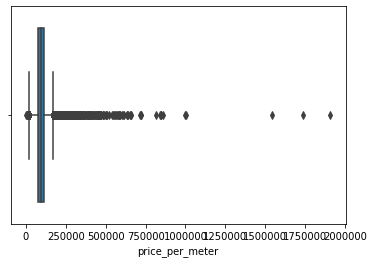

In [76]:
sns.boxplot(x='price_per_meter', data=data)

Преобразуем в дату объект first_day_exposition:

In [77]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Добавим день недели, месяц и год публикации объявления.

In [78]:
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

Категоризируем значения столбца floor со значениями первый, последний, другой.

In [79]:
def code_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
data['floor'] = data.apply(code_floor, axis=1)

In [80]:
data['floor'].value_counts()

другой       17442
последний     3340
первый        2917
Name: floor, dtype: int64

Добавим соотношение жилой и общей площади и отношение площади кухни к общей:

In [81]:
data['living_to_total'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_to_total'] = round(data['kitchen_area'] / data['total_area'], 2)

In [82]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_weekday,publication_month,publication_year,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,другой,0,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,0.47,0.19
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,первый,0,...,NaN,0.0,NaN,81.0,82921.0,1,12,2018,0.46,0.19
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,другой,0,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,0.61,0.19
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,31.3,другой,0,...,84.0,3.0,234.0,424.0,408176.0,4,7,2015,0.20,0.19
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,другой,0,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,0.32,0.19


### Вывод

Были добавлены следующие признаки: стоимость квадратного метра квартиры, день недели, месяц и год публикации объявления о продаже, соотноение жилой площади к общей и площади кухни к общей площади.

Категоризовали значения столбца floors: первый, последний и другой.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

1) *Рассмотрим внимательнее следующие параметры: площадь, цена, число комнат, высота потолков. И построим гистограммы для каждого параметра.*

#### total_area

In [83]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

- 75% всех объявлений о продаже квартиры площадью менее 70 квадратных метров. 

- В данных есть аномально большие значения - квартиры с площадью более 200 кв м, поэтому медианное значение меньше среднего.

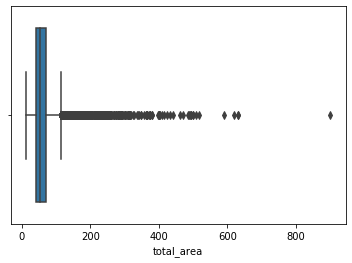

In [84]:
sns.boxplot(x='total_area', data=data)

"Усы" на графике простираются влево и вправо от границ ящика на расстояние, равное 1.5 межквартильным размахам. В размах усов попадают нормальных значения, а за пределами находятся выбросы, изображенные точками.

In [85]:
len(data.query('total_area > 200'))

227

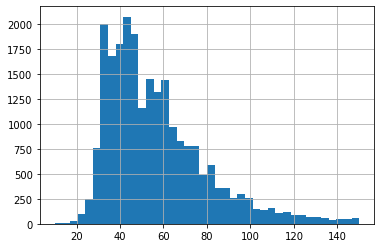

In [86]:
data['total_area'].hist(bins=40, range=(10, 150))

- В данных есть два пика в районе 40 кв м и в районе 60 кв м. Возможная причина пиков - 1ый пик это площадь 1-2 комнатных квартир, второй пик - площадь 3-хкомнатных квартир. Большинство объявлений квартиры с площадью менее 100 кв м.

#### last_price

In [87]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

- 75% всех квратир стоят меннее 7 млн. рублей.

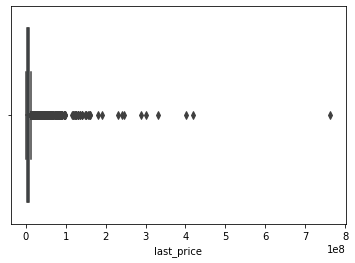

In [88]:
sns.boxplot(x='last_price', data=data)

"Усы" на графике простираются влево и вправо от границ ящика на расстояние, равное 1.5 межквартильным размахам. В размах усов попадают нормальных значения, а за пределами находятся выбросы, изображенные точками.

In [89]:
len(data.query('last_price > 100000000')), len(data.query('last_price < 500000'))

(37, 14)

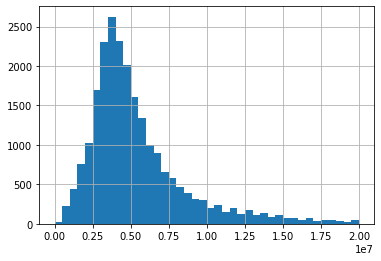

In [90]:
data['last_price'].hist(bins=40, range=(10000, 20000000))

- Большинство квартир стоит в районе 10 млн рублей

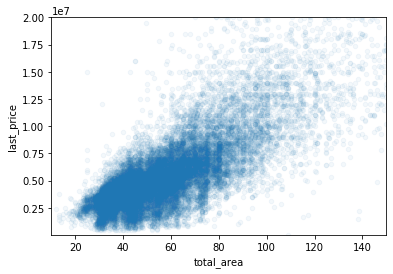

In [91]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, xlim=(10,150), ylim=(10000, 20000000))

In [92]:
len(data.query('total_area<200 and 500000 <last_price< 100000000'))/len(data)

0.9892400523228828

- Почти 99% всех объявлений о квартирах - с площадью менне 200 кв м, стоимостью от 500000-100000000 млн рублей.

- Чем больше площадь квартиры, тем выше ее стоимость.

### price_per_meter

In [93]:
data['price_per_meter'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.120000e+02
25%      7.658550e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

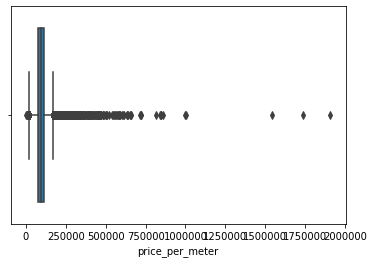

In [94]:
sns.boxplot(x='price_per_meter', data=data)

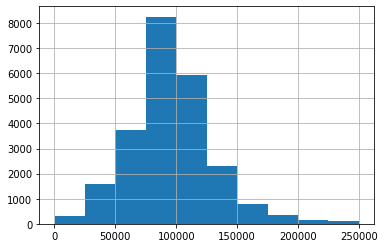

In [95]:
data['price_per_meter'].hist(range=(100, 250000))

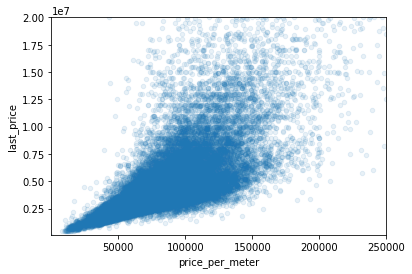

In [96]:
data.plot(x='price_per_meter', y='last_price', kind='scatter', alpha=0.1, xlim=(100,250000), ylim=(100000, 20000000))

Чем больше стоимоть квадратного метра, тем выше стоимость недвижимости.

#### rooms

In [97]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

- 75 % всех квартир одно-, двух-, и трехкомнатные.

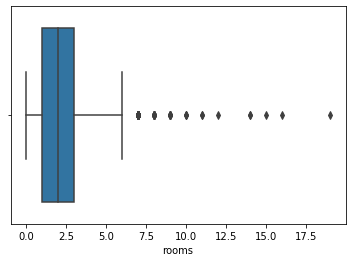

In [98]:
sns.boxplot(x='rooms', data=data)

In [99]:
(data['rooms'].value_counts()[:7].sum() - 197)/len(data)

0.9878897843790877

- Около 99% всех квартир  - 1-6 комнатые.

- В 197 объявлениях указано, что в квартире нет комнат. Это настораживает, возможно, это не настоящие объявелния.

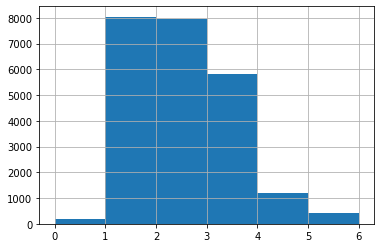

In [100]:
data['rooms'].hist(bins=6, range=(0, 6))

- Большинство квартир 1-3 комнатные.

(2000000, 20000000)

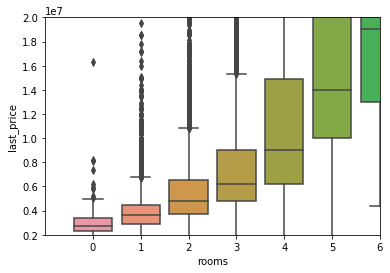

In [101]:
ax = sns.boxplot(x='rooms', y='last_price', data=data)
ax.set_xlim(-1,6)
ax.set_ylim(2000000, 20000000)

- Чем больше количество комнат, тем выше стоимость квартиры (так как общая площадь квартиры увеличивается).

#### ceiling height

In [102]:
data['ceiling_height'].describe()

count    23543.000000
mean         2.734102
std          1.012723
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

- Видны аномальные значения - 1 м и 100 м.

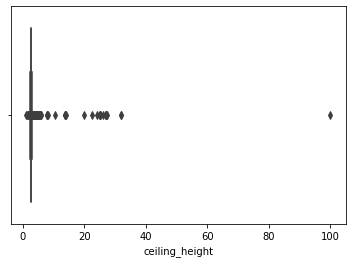

In [103]:
sns.boxplot(x='ceiling_height', data=data)

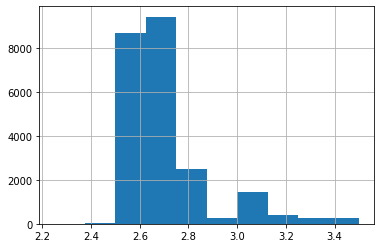

In [104]:
data['ceiling_height'].hist(bins=10, range=(2.25,3.5))

- Большинство квартир с высотой потолков 2.75 м, есть небольшой второй пик с высотой потолков 3 м.

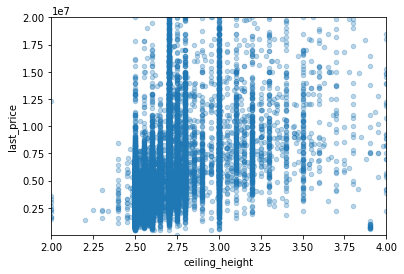

In [105]:
data.plot(x='ceiling_height', y='last_price', kind='scatter', alpha=0.3, xlim=(2,4), ylim=(10000, 20000000))

#### living_to_total

In [106]:
data['living_to_total'].describe()

count    23677.000000
mean         0.566201
std          0.126538
min          0.020000
25%          0.490000
50%          0.570000
75%          0.640000
max          3.870000
Name: living_to_total, dtype: float64

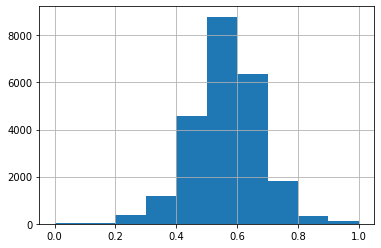

In [107]:
data['living_to_total'].hist(range=(0,1))

- Обычно соотношение жилой площади к общей находится в диапозоне 0.4-0.7

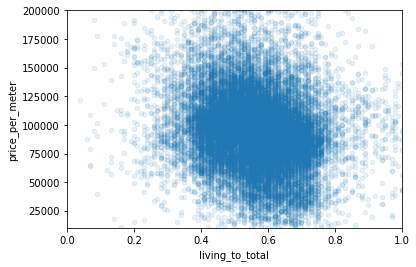

In [108]:
data.plot(x='living_to_total', y='price_per_meter', kind='scatter', alpha=0.1, xlim=(0,1), ylim=(10000, 200000))

#### kitchen_to_total

In [109]:
data['kitchen_to_total'].describe()

count    2.369900e+04
mean     1.900000e-01
std      2.775616e-17
min      1.900000e-01
25%      1.900000e-01
50%      1.900000e-01
75%      1.900000e-01
max      1.900000e-01
Name: kitchen_to_total, dtype: float64

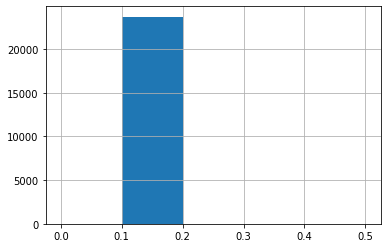

In [110]:
data['kitchen_to_total'].hist(range=(0,0.5), bins=5)

- Cоотношение площади кухни к общей находится в диапозоне 0.1-0.2

In [111]:
df = data[['last_price', 'total_area', 'price_per_meter', 'rooms', 'ceiling_height']]
df.corr()

,last_price,total_area,price_per_meter,rooms,ceiling_height
last_price,1.000000,0.653675,0.736499,0.363343,0.064932
total_area,0.653675,1.000000,0.301960,0.758344,0.079266
price_per_meter,0.736499,0.301960,1.000000,0.055420,0.103295
rooms,0.363343,0.758344,0.055420,1.000000,0.046023
ceiling_height,0.064932,0.079266,0.103295,0.046023,1.000000


#### Выводы

- Чем больше стоимоть квадратного метра, тем выше стоимость недвижимости (кк 0.74). Почти 99% всех объявлений о квартирах - с площадью менне 200 кв м, стоимостью от 500 тысяч до 100 млн рублей.

- Чем больше площадь квартиры, тем выше ее стоимость (коэффициент корреляции, кк, 0.65). Большинство квартир 1-3 комнатные.

- Чем больше количество комнат, тем больше площадь квартиры (кк - 0.75) и выше стоимость квартиры (кк - 0.36). В 197 объявлениях указано, что в квартире нет комнат. Это настораживает, возможно, это не настоящие объявелния.

- Высота потолков в квартире не сильное влияет на стоимость квартиры (коэффициент корреляции 0.06). Большинство квартир с высотой потолков 2.75 м, 3 м.

2) *Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?*

In [112]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

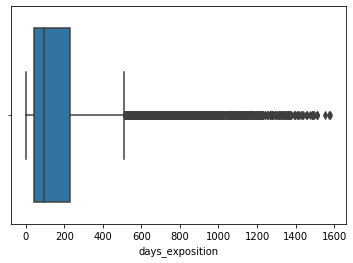

In [113]:
sns.boxplot(x='days_exposition', data=data)

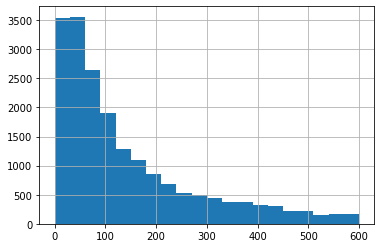

In [114]:
data['days_exposition'].hist(bins=20, range=(0, 600))

Хотя данные и напоминают распределение Пуассона, это не оно. Распределение Пуассона отвечает за число событий, произошедших за определенное время.

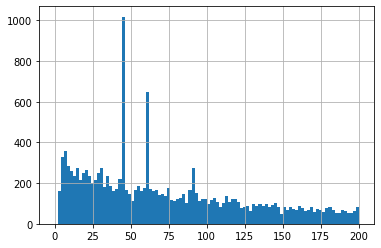

In [115]:
data['days_exposition'].hist(bins=100, range=(0, 200))

В данных видны необычно сильные пики продаж в районе 40 и 60 дней с даты публикации, когда в день продавались более 1000 и 600 квартир. На 45й и 60й день, в зависимости от типа объявления, на сервисе происходит автоматическая деактивация объявлений.

Обычно продажа занимает до полутора лет. Среднее количетво дней продажи 180, медианное значени - 95. Очень большая разница - медианна почти в два раза меньше среднего - говорит о том, что в данных больше небольших значений дней продажи (до года) и есть длинный хвост необычно долгих сроков продажи квартры (более 1,5 лет / от 500 дней). Необычно долгими будем называть продажи от 500 дней. В данных также присутсвуют очень быстрые продажи - менее 5 дней.

In [116]:
len(data.query('5 > days_exposition')), len(data.query('500 < days_exposition'))

(338, 1749)

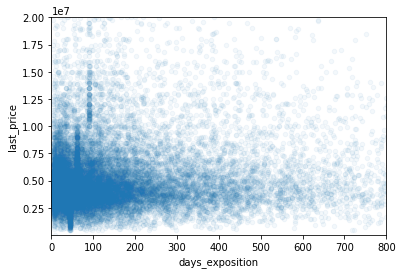

In [117]:
data.plot(x='days_exposition', y='last_price', kind='scatter', alpha=0.05, xlim=(0,800), ylim=(10000, 20000000))

In [118]:
data['days_exposition'].corr(data['last_price'])

0.08114593098611304

Большинство квартир продается за срок до года по стоимости до 10 млн рублей. Сроки продажи квартиры явно не сльно связаны с её стоимостью (кк 0.08).

3) *Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.*

а) удалим аномально большие квартиры, с площадью более 200 кв м, которые составляют менее 1% всех квартир.

In [119]:
len(data.query('total_area > 200'))/len(data)

0.009578463226296468

In [120]:
data = data.query('total_area < 200')

In [121]:
data['total_area'].describe()

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

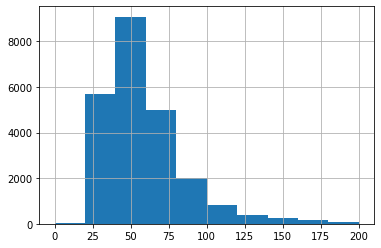

In [122]:
data['total_area'].hist(range=(0, 200))

б) удалим аномально дорогие, дороже 100 млн рублей, и аномально дешевые квартиры, стоимостью менее 500 тысяч рублей, составляющих менее 1% всех данных.

In [123]:
len(data.query('last_price > 100000000 or last_price < 500000'))/len(data)

0.0008522243054371911

In [124]:
data = data.query('500000 < last_price < 100000000')

In [125]:
data['last_price'].describe()

count    2.344400e+04
mean     5.980664e+06
std      5.335532e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.800000e+07
Name: last_price, dtype: float64

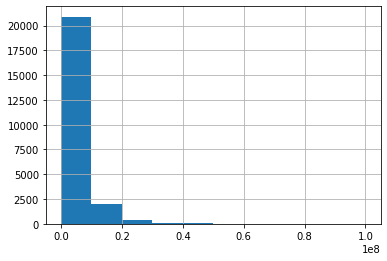

In [126]:
data['last_price'].hist(range=(0, 100000000))

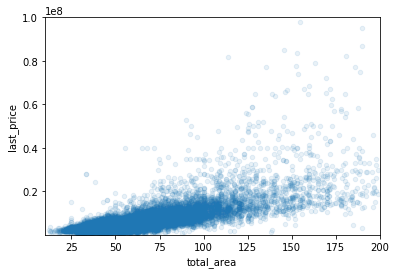

In [127]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, xlim=(10, 200), ylim=(10000, 100000000))

в) Удалим квартиры без комнат и квартиры, в которых от 7 комнат, составляющие менее 1 % всех квартир.

In [128]:
len(data.query('rooms == 0 or rooms > 6'))/len(data)

0.009384064152874936

In [129]:
data = data.query('0 < rooms < 7')

(200000, 30000000)

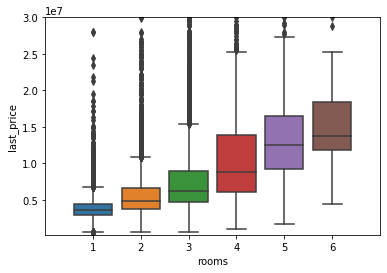

In [130]:
ax = sns.boxplot(x='rooms', y='last_price', data=data)
ax.set_xlim(-1,6)
ax.set_ylim(200000, 30000000)

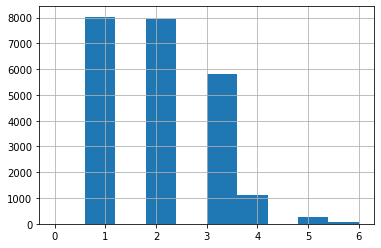

In [131]:
data['rooms'].hist(range=(0,6))

г) удалим объявления, которые публиковались аномально коротки срок (менее 5 дней) и аномально долгий срок (около полутора лет). Эти шумовые данные составляют 8.7% всех данных.

In [132]:
len(data.query('5 > days_exposition or 500 < days_exposition'))/len(data)

0.08736651739579746

In [133]:
data = data.query('5 < days_exposition < 500')

In [134]:
data['days_exposition'].describe()

count    17944.000000
mean       130.401973
std        118.927651
min          6.000000
25%         44.000000
50%         89.000000
75%        185.000000
max        499.000000
Name: days_exposition, dtype: float64

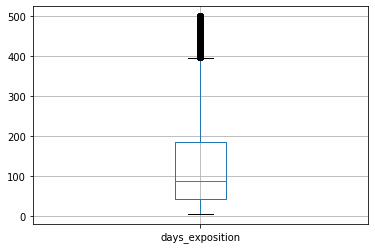

In [135]:
data.boxplot('days_exposition')

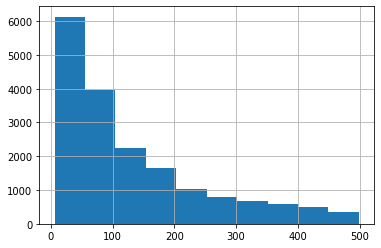

In [136]:
data['days_exposition'].hist()

д) Квартиры с высотобой потолков более 5 м и менее 1.5, составляющие менее 1% всех квартир.

In [137]:
len(data.query('5 < ceiling_height or ceiling_height < 1.5'))/len(data)

0.0015046812304948729

In [138]:
data = data.query('1.5 <ceiling_height < 5')

In [139]:
data['ceiling_height'].describe()

count    17803.000000
mean         2.689299
std          0.197299
min          1.750000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

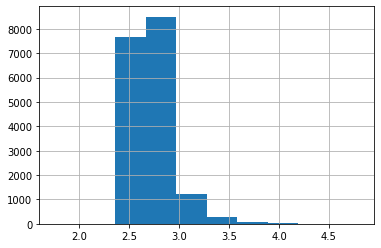

In [140]:
data['ceiling_height'].hist()

#### Выводы

После удаления аномальных данных:

- квартир, площадью более 200 кв м
- стоимостью менее 500000 рублей и более 100 млн рублей (хотя сегодня это вполне реальная цена)
- квартиры без комнат и квартир, в которых от 7 комнат
- квартир в высотой потолков более 5м и менее 1.5м
- объявлений, которые публиковались слишком короткий срок, менее 5 дней, и очень долгий срок более полутра лет.

Медиана стала ближе к среднему для всех параметров. Осталось менее 8 % пропущенных значений.

In [141]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f'Количество пропущенных значений:\n{missing_values}')
print('\nДоля пропущенных значений в данных: {:.1%}'.format(missing_values.sum()/data.size))

Количество пропущенных значений:
parks_nearest          11866
ponds_nearest          11051
airports_nearest        4043
ponds_around3000        4025
parks_around3000        4025
cityCenters_nearest     4025
locality_name             12
living_to_total            3
living_area                3
dtype: int64

Доля пропущенных значений в данных: 7.8%


In [142]:
data.shape

(17803, 28)

4) *Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.*

In [143]:
df = data[['last_price', 'price_per_meter', 'rooms', 'cityCenters_nearest']].copy() 

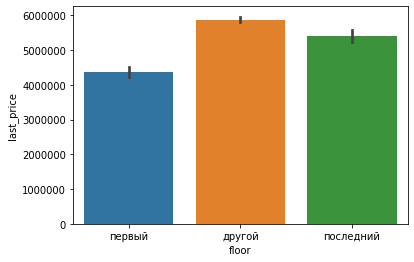

In [144]:
sns.barplot(x='floor', y='last_price', data=data)

Самые дорогие квартиры не на первом и не на последнем этаже, а самые недорогие - на первом.

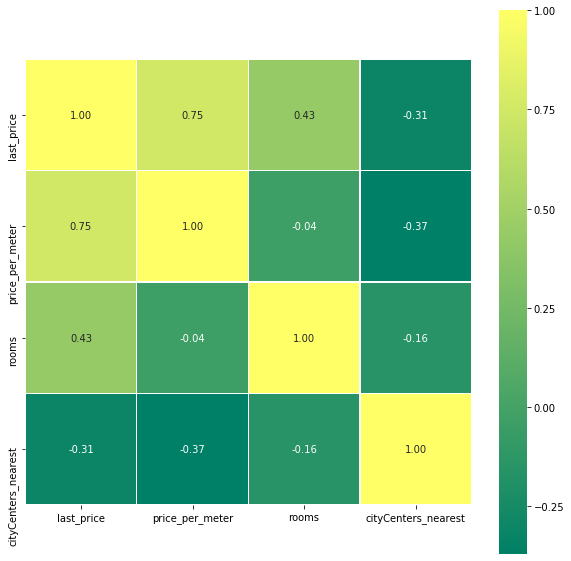

In [145]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap='summer', square=True)

Больше всего на стоимость вляет цена за квадратный метр (кк 0.75) и количество комнат (кк 0.43). Здесь прямо пропорциональная зависимость - чем больше комнат, тем обычно больше площадь, тем выше стоимость жилья. Расстояние до центра (кк -0.31) обратно попорционально стоимости жилья, чем меньше расстояние до цетра, то есть чем ближе к центру находится недвижимость, тем стоимость выше. Это же видно и на диаграммах рассеиния.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4c2a11bd0>,
      dtype=object)

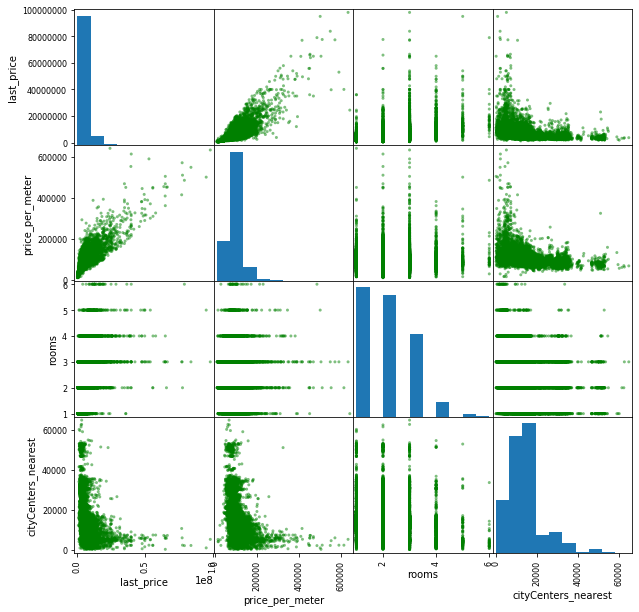

In [146]:
scatter_matrix(df, figsize=(10,10), color='green')

(2,1) чем дороже стоит квадратный метр, тем дороже стоимость квартры

(3,1) 3-4х комнатные квартиры стоят дороже чем 1-2комнатные

(3,2) стоимость квадратного метра в одной-двух комнатной квартире обычно дороже стоимости квадратного метра в 3-6 комнатных

(4,1) чем ближе недвижимость к центру города, тем ее цена выше

(4,2) в центре стоимость квадратного метра выше

(4,3) в центре обычно продаются 1-3 комнатные квартиры 

In [147]:
df = data[['last_price', 'publication_weekday', 'publication_month', 'publication_year']]

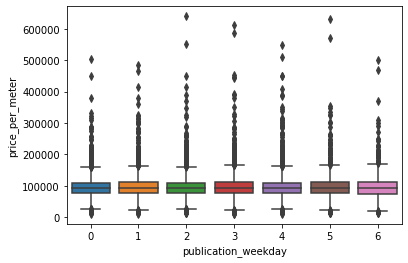

In [148]:
sns.boxplot(x='publication_weekday', y='price_per_meter', data=data)

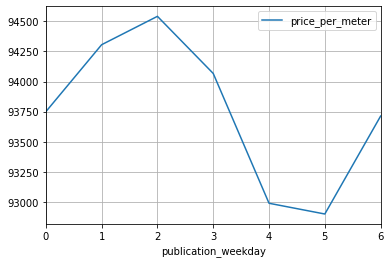

In [149]:
data.pivot_table(index='publication_weekday', values='price_per_meter', aggfunc='median').plot(grid=True)

Объявления, опубликованные в середине недели в среднем были о более дорогостоящих квартрах, чем объявления, опубликованные на выходных.

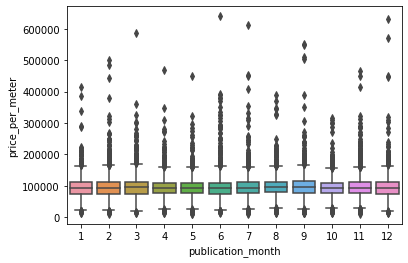

In [150]:
sns.boxplot(x='publication_month', y='price_per_meter', data=data)

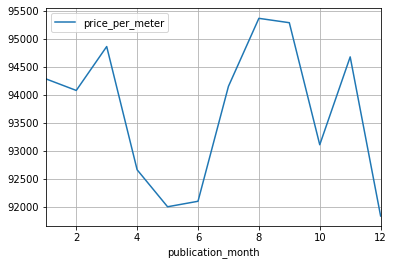

In [151]:
data.pivot_table(index='publication_month', values='price_per_meter', aggfunc='median').plot(grid=True)

Самые дорогие квартиры продаюст в августе и сентябре, самые недорогие - в мае и декабре. Возможно, в конце лета принимаются более взвешенные решения, чем в конце зимы или весны.

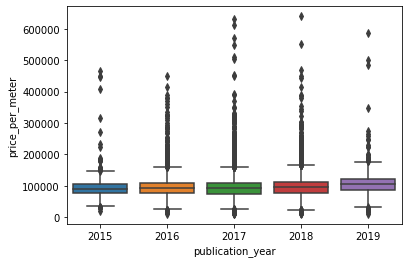

In [152]:
sns.boxplot(x='publication_year', y='price_per_meter', data=data)

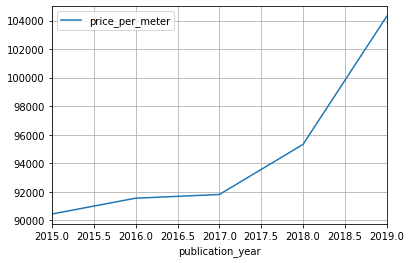

In [153]:
data.pivot_table(index='publication_year', values='price_per_meter', aggfunc='median').plot(grid=True)

Видим, что цены растут с 90 тысяч рублей за кв м в 2015 до 105 тыс за кв м в 2019. Почти на 17 %.

In [154]:
(105000-90000)/90000

0.16666666666666666

#### Выводы

Больше всего на стоимость вляет цена за квадратный метр (кк 0.75) и количество комнат (кк 0.43). Здесь прямо пропорциональная зависимость - чем больше комнат, тем обычно больше площадь, тем выше стоимость жилья. Расстояние до центра (кк -0.31) обратно попорционально стоимости жилья, чем меньше расстояние до цетра, то есть чем ближе к центру находится недвижимость, тем стоимость выше. 

На диаграммах рассеиния видно: 
- чем дороже стоит квадратный метр, тем дороже стоимость квартры

- 3-4х комнатные квартиры стоят дороже чем 1-2комнатные

- стоимость квадратного метра в одной-двух комнатной квартире обычно дороже стоимости квадратного метра в 3-6 комнатных

- чем ближе недвижимость к центру города, тем ее цена выше

- в центре стоимость квадратного метра выше

- в центре обычно продаются 1-3 комнатные квартиры 


Объявления, опубликованные в середине недели в среднем были о более дорогостоящих квартрах, чем объявления, опубликованные на выходных.

Самые дорогие квартиры продаюст в августе и сентябре, самые недорогие - в мае и декабре. Возможно, в конце лета принимаются более взвешенные решения, чем в конце зимы или весны.

Видим, что цены выросли с 90 тысяч рублей за кв м в 2015 до 105 тыс за кв м в 2019. Почти на 17 %.

5) *Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.*

- Первый способ

In [155]:
most_names = data['locality_name'].value_counts().sort_values(ascending=False).head(10) # 10 населённых пунктов с наибольшим числом объявлений

In [156]:
data.query('locality_name in @most_names.index').pivot_table(index='locality_name', values='price_per_meter').sort_values(by='price_per_meter',ascending=False)

,price_per_meter
locality_name,
Санкт-Петербург,110032.140814
Пушкин,101318.367041
деревня Кудрово,92268.502041
посёлок Парголово,89409.711679
посёлок Мурино,85414.439462
посёлок Шушары,77671.475936
Колпино,74627.347518
Всеволожск,68693.195286
Гатчина,68045.821277


- Второй способ

In [157]:
data1 = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
data1.columns = ['count', 'mean'] 
data1['mean'] = data1['mean'].astype(int)
data1 = data1.sort_values(by='count', ascending=False).head(10) # 10 населённых пунктов с наибольшим числом объявлений

In [158]:
data1.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,11817,110032
Пушкин,267,101318
деревня Кудрово,245,92268
посёлок Парголово,274,89409
посёлок Мурино,446,85414
посёлок Шушары,374,77671
Колпино,282,74627
Всеволожск,297,68693
Гатчина,235,68045


Среди 10 населенных пунктов с наибольшим количеством объявлений (от 11817 в Санкт-Петербурге до 189 в Выборге), самая высокая стоимость жилья в: Санкт-Петербурге (110000 руб/кв м), Пушкине (101000 руб/кв м), деревне Кудрово (92000 руб/кв м), посёлке Парголово (90000 руб/кв м), посёлке Мурино (85000 руб/кв м).

Среди 10 населенных пунктов с наибольшим количеством объявлений, самая низкая стоимость жилья в: посёлке Шушары, Колпино, Всеволжске, Гатчине, Выборге (стоимость от 78000 руб/кв м до 57000 руб/кв м).

6) *Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.*

Выделим квартиры в Санкт-Петербурге.

In [159]:
sp_data = data.query('locality_name == "Санкт-Петербург"')

Создадим столбец с расстоянием до центра в км: разделим cityCenters_nearest на 1000 и округлим с помощью фукнции round до целых.

In [160]:
sp_data['cityCenters_nearest_km'] = round(sp_data['cityCenters_nearest']/1000, 0)

С помощью pivot_table посчитаем среднюю цену квадратного метра для каждого километра и построим график. 

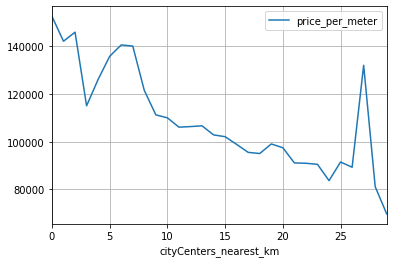

In [161]:
sp_data.pivot_table(index='cityCenters_nearest_km', values='price_per_meter').plot(grid=True)

### Выводы

График показывает, как цена квадратного метра зависит от удалённости от центра. Видно, что после 7 км удалености от центра график сильно меняется — занчит, это и есть центральная зона. 

Также на графике около 3 км от центра есть локальным минимум и около 27 км от центра есть локальный максимум. Вероятно, это шумовые данные. Или в центре есть район с относительно недорогими квартирами, и в области есть район с очень дорогими квартирами.

In [162]:
sp_data['cityCenters_nearest_km'].corr(sp_data['price_per_meter'])

-0.34465094963889237

7) *Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?*

Выделим сегмент квартир в центре Санкт-Петербурга, ограничив расстояние от центра до 7 км включительно.

In [163]:
sp_center_data = sp_data.query('cityCenters_nearest_km <= 7')

In [164]:
len(sp_center_data)

2297

#### price_per_meter

In [165]:
sp_center_data['price_per_meter'].describe()

count      2297.000000
mean     134642.344362
std       60896.774380
min       15345.000000
25%       99275.000000
50%      119571.000000
75%      149701.000000
max      632258.000000
Name: price_per_meter, dtype: float64

Посмотрим на гистограмму для цены за квадратный метр для центрального району Санкт-Петербугра.

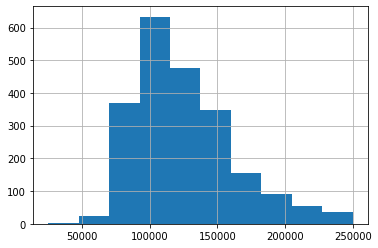

In [166]:
sp_center_data['price_per_meter'].hist(range=(25000, 250000))

Видим, что более дорогих (стомость квадратного метра более 100000 руб) квартир в центре больше, чем относительно недорогих (стоимость квадратного метра меньше 100000 руб). Этот вывод отличается от результата для всего города - в котором больше недорогих квартир, чем дорогих.

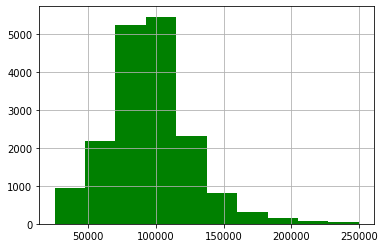

In [167]:
data['price_per_meter'].hist(range=(25000, 250000), color='g') # для сравнения

#### rooms

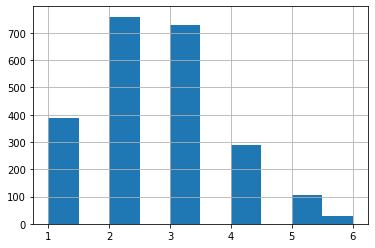

In [185]:
sp_center_data['rooms'].hist()

Видим, что большинство квартир в центральном районе - 1-,2-,3-комнатные, как и во всем городе.

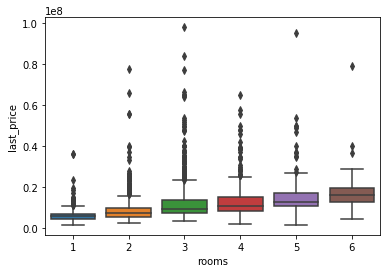

In [186]:
sns.boxplot(x='rooms', y='last_price', data=sp_center_data)

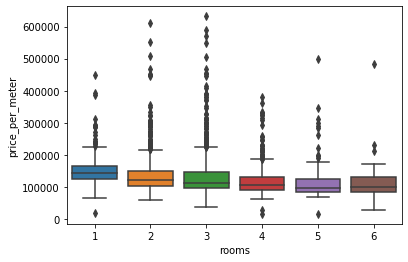

In [187]:
sns.boxplot(x='rooms', y='price_per_meter', data=sp_center_data)

Чем больше в квартире комнат, тем ее цена ваше. Также как и в общих выводах. Второй график показывает, что стоимость квадартного метра уменьшается при увеличении числа комнат (а также и общей площади квариры).

#### ceiling height

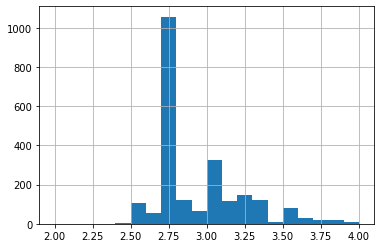

In [188]:
sp_center_data['ceiling_height'].hist(range=(2, 4), bins=20)

In [189]:
sp_center_data['ceiling_height'].value_counts()

2.70    974
3.00    284
3.20    112
2.50     84
2.80     76
       ... 
3.59      1
4.15      1
3.88      1
4.80      1
3.14      1
Name: ceiling_height, Length: 115, dtype: int64

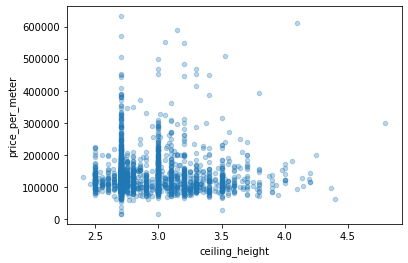

In [190]:
sp_center_data.plot(x='ceiling_height', y='price_per_meter', alpha=0.3, kind='scatter')

In [191]:
sp_center_data['ceiling_height'].corr(sp_center_data['price_per_meter'])

0.02093695937629417

Явной зависимости между высотой потолков в квартире и стоимостью нет. Также как и в общем выводе.

### floor

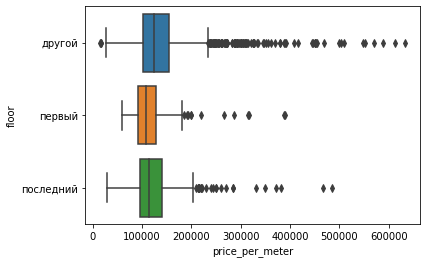

In [193]:
sns.boxplot(y='floor', x='price_per_meter', data=sp_center_data)

Самые дорогие квартиры находятся не на первом и не на последнем этаже. Квартиры на первом этаже - саме недорогие. Также как и в общем случае.

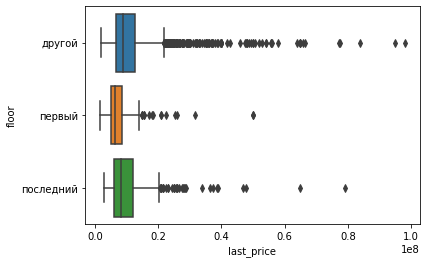

In [195]:
sns.boxplot(y='floor', x='last_price', data=sp_center_data)

### cityCenters_nearest_km

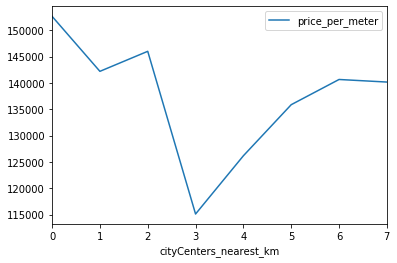

In [196]:
sp_center_data.pivot_table(index='cityCenters_nearest_km', values='price_per_meter').plot()

На расстоянии 3-4 км от цетнра видна аномалия: от 0-2 и от 5-7 стоимость квадратного метра изменяется в переделах 140-150 тыс/кв м, а на расстоянии около 3- км стоимость кв м снижается до 115-130 тыс рублей/ кв м. 

В общем выводе для всего города - цена квадратного метра снижалась с увеличением расстояни от центра и также был локальный мин цены, соответсвующий недвижимости, расположенной около 3 км от центра.

In [197]:
sp_center_data.query('cityCenters_nearest_km == 3')['price_per_meter'].describe()

count       225.000000
mean     115115.266667
std       37171.161018
min       63525.000000
25%       92537.000000
50%      106838.000000
75%      127778.000000
max      444444.000000
Name: price_per_meter, dtype: float64

In [198]:
sp_center_data.query('cityCenters_nearest_km == 3 and price_per_meter < 90000').shape[0]

41

Возможно, в центре Санкт-Петербурга есть сектор относительно недорогих квартир.

### publication_date

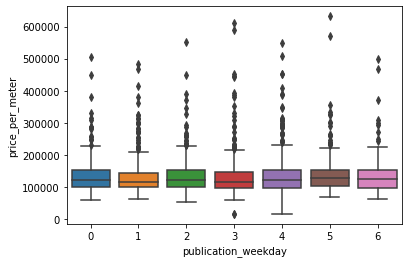

In [199]:
sns.boxplot(x='publication_weekday', y='price_per_meter', data=sp_center_data)

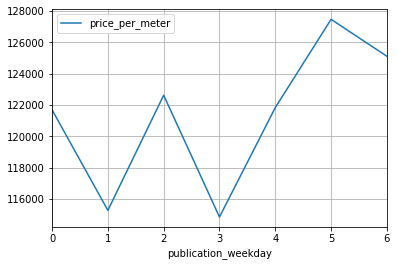

In [200]:
sp_center_data.pivot_table(index='publication_weekday', values='price_per_meter', aggfunc='median').plot(grid=True)

В центре более дорогие квартиры продаются на выходных, чем в рабочие дни.

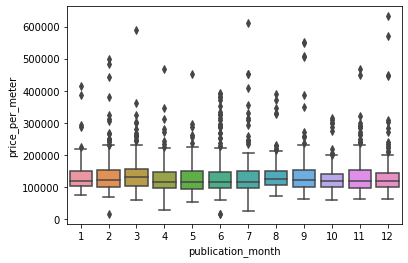

In [201]:
sns.boxplot(x='publication_month', y='price_per_meter', data=sp_center_data)

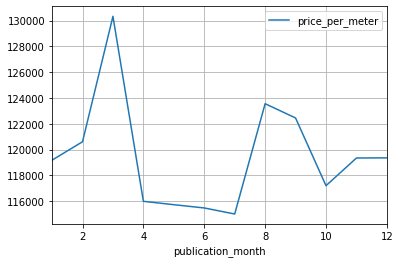

In [202]:
sp_center_data.pivot_table(index='publication_month', values='price_per_meter', aggfunc='median').plot(grid=True)

Самые дорогие квартиры в центре выставлялись на продажу в марте, самые недорогие - с мая по июль.

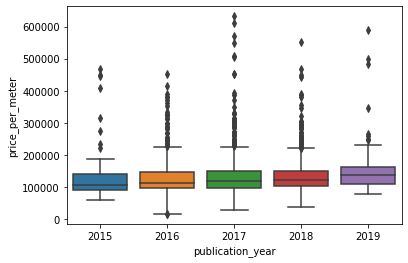

In [203]:
sns.boxplot(x='publication_year', y='price_per_meter', data=sp_center_data)

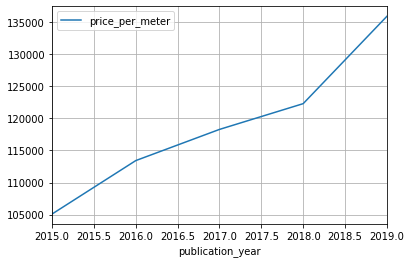

In [204]:
sp_center_data.pivot_table(index='publication_year', values='price_per_meter', aggfunc='median').plot(grid=True)

В центре Санкт-Петербурга стоимость квадтратного метра с 2015 год выросла в среднем с 105000 руб/кв м до 135000 руб/кв м, почти на 30 %.

In [207]:
(135-105)/105

0.2857142857142857

### Вывод

Увидели, что: 

- более дорогих (стомость квадратного метра более 100000 руб) квартир в центре больше, чем относительно недорогих (стоимость квадратного метра меньше 100000 руб). Этот вывод отличается от результата для всего города - в котором больше недорогих квартир, чем дорогих;

- большинство квартир в центральном районе - 1-,2-,3-комнатные, как и во всем городе; и чем больше в квартире комнат, тем ее цена выше (также как и в общих выводах);

- стоимость квадартного метра уменьшается при увеличении числа комнат, а также и общей площади квариры (также как и в общих выводах);

- явной зависимости между высотой потолков в квартире и стоимостью нет (также как и в общем выводе);

- самые дорогие квартиры находятся не на первом и не на последнем этаже, квартиры на первом этаже - саме недорогие (также как и в общем случае);

- на расстоянии 3-4 км от цетнра видна аномалия: от 0-2 и от 5-7 км стоимость квадратного метра изменяется в переделах 140-150 тыс/кв м, а на расстоянии около 3- км стоимость кв м снижается до 115-130 тыс рублей/ кв м (в общем выводе для всего города - цена квадратного метра также снижалась с увеличением расстояни от центра и также был локальный мин цены, соответсвующий недвижимости, расположенной около 3 км от центра) возможно, в центре Санкт-Петербурга есть сектор относительно недорогих квартир;

- в центре более дорогие квартиры продаются на выходных, чем в рабочие дни;

- самые дорогие квартиры в центре выставлялись на продажу в марте, самые недорогие - с мая по июль;

- в центре Санкт-Петербурга стоимость квадтратного метра с 2015 год выросла в среднем с 105000 руб/кв м до 135000 руб/кв м, почти на 30 %.

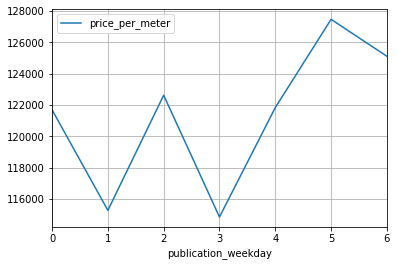

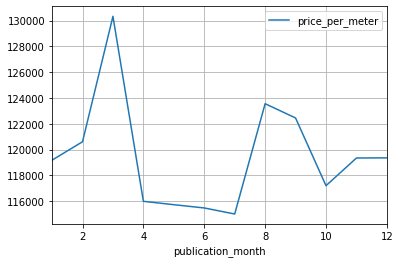

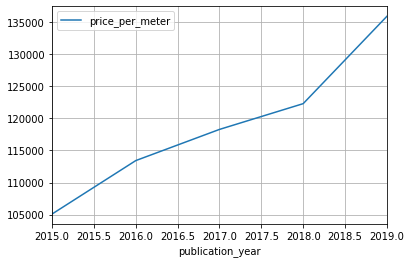

In [208]:
date = ['publication_weekday', 'publication_month', 'publication_year']

for col in date:
    sp_center_data.pivot_table(index=col, values='price_per_meter', aggfunc='median').plot(grid=True)

### Шаг 5. Общий вывод

1) В исходных данных было 23699 объектов, доля пропущенных значений - 19.5%.

2) Предобработка помогла снизить долю пропущенных занчений с 19.5% до 10.7%. Пропущенные значения - высота потолков и жилая площадь - заменили на медианное значение по населенному райнону по возможности; пропуски для количества этажей в доме заполнили модой, самой частой этажностью дома в городе; пропущенные значения для площади кухни восстановили, посчитав среднее отношения площади кухни к общей площади и умножили этот коэффициент на общую площадь.
Пропуски в данных, полученных на основе картографических данных решили не трогать (расстояния до аэропотра, центра города, ближайшего парка, ближайшего водоема, количестов парков и водоемов в округе).
На этом этапе в данных были однаружены явные аномалии: слишком высокие (более 100 млн рублей) и низкие (менее 500 тыс рублей) цены; очень большие квартиры с площадью (более 200 кв м); очень низкие значения высоты потолков  (менее 1.5 м) и очень высокие значения высоты потолков (более 5 м); квартиры без комнат и с более чем 6 комнатами; в 49 объявлениях не указан населенный пункт. Данные аномалии в объявлениях настораживают. Возможно, это ненастоящие объявления.

Было произведено преобразование вещестенного типа в целочисленный для количества балконов и этажей в доме, так как они не могут быть дробными; и преобразование булевых в целочисленный тип is_appratment, open_plan, studio.

3) Далее были добавлены следующие признаки: стоимость квадратного метра квартиры, день недели, месяц и год публикации объявления о продаже, соотношение жилой площади к общей и площади кухни к общей площади; и категоризованы значения столбца floors - первый, последний и другой.

4.1 и 4.4 Были изучены парамтеры, определяющие стоимость объектов недвижимости. 

а) Чем больше стоимоть квадратного метра, тем выше стоимость недвижимости (кк 0.74).

б) Чем больше площадь квартиры, тем выше ее стоимость(коэффициент корреляции 0.65). Почти 99% всех объявлений о квартирах - с площадью менее 200 кв м, стоимостью от 500 тысяч до 100 млн рублей.

в) Чем больше количество комнат, тем больше площадь квартиры (кк - 0.75) и выше стоимость квартиры (кк - 0.36). Большинство квартир 1-3 комнатные. В 197 объявлениях указано, что в квартире нет комнат. Это настораживает, возможно, это ненастоящие объявелния.

г) Высота потолков в квартире не сильно влияет на стоимость квартиры (коэффициент корреляции 0.06). Большинство квартир с высотой потолков 2.75 м, 3 м.

д) Расстояние до центра (кк -0.35) обратно попорционално стоимости жилья, чем меньше расстояние до цетра, то есть чем ближе к центру находится недвижимость, тем стоимость выше. 

е) Самые дорогие квартиры не на первом и не на последнем этаже, а самые недорогие - на первом.

4.2) Также было изучено время продажи квартры. Обычно продажа занимает до года. Среднее количетво дней продажи 180, медианное значени до 95. Очень большая разница - медианна почти в два раза меньше среднего - говорит о том, что в данных больше небольших значений дней продажи (до года) и есть длинный хвост необычно долгих сроков продажи квартры (более полутора лет). Необычно долгими будем называть продажи от полутора лет. В данных также присутсвуют очень быстрые продажи - менее 5 дней.


4.3) После удаления редких и выбивающихся данных - квартир, площадью более 200 кв м; стоимостью менее 500000 рублей и более 100 млн рублей; квартиры без комнат и квартир, в которых от 7 комнат; квартир с высотой потолков более 5м и менее 1.5м; объявлений, которые публиковались слишком короткий срок, менее 5 дней, и очень долгий срок, от полутора лет; - медиана стала ближе к среднему для всех параметров. Осталось *менее 8% пропущенных значений*.


4.5) Среди 10 населенных пунктов с наибольшим количеством объявлений (от 11817 в Санкт-Петербурге до 189 в Выборге), самая высокая стоимость жилья в: Санкт-Петербурге (110000 руб/кв м), Пушкине (101000 руб/кв м), деревне Кудрово (92000 руб/кв м), посёлке Парголово (90000 руб/кв м), посёлке Мурино (85000 руб/кв м).
Среди 10 населенных пунктов с наибольшим количеством объявлений, самая низкая стоимость жилья в: посёлке Шушары, Колпино, Всеволжске, Гатчине, Выборге (стоимость от 78000 руб/кв м до 57000 руб/кв м).

4.6)Увидели, что цена квадратного метра зависит от удалённости от центра. Нашли центральную область - 7 км. 

Цены на жилую недвижимость выросли с 90 тысяч рублей за кв м в 2015 до 105 тыс за кв м в 2019. Почти на 17 %.

4.7) Отдельно исследовали сегмент квартир в центре. На стоимость квартиры в центре также влияет - площадь квартиры, количество комнат, этаж, увдленность от цетра. В отличие от общего случая в центре больше более дорогих (стомость квадратного метра более 100000 руб) квартир, чем относительно недорогих (стоимость квадратного метра меньше 100000 руб).

В центре Санкт-Петербурга стоимость квадтратного метра с 2015 год выросла в среднем с 105000 руб/кв м до 135000 руб/кв м, почти на 30%.